In [3]:
from Functions import *
data = pd.read_csv('DATA/mall_customers_no_id')

In [4]:
warnings.filterwarnings('ignore')

In [5]:
preprossecing = ColumnTransformer(
    [
        ('Standard',StandardScaler() ,['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
        ('Onehot',OneHotEncoder(),['Gender'])
    ]
) 


In [6]:
pipeline = Pipeline(
    steps=[
        
        ('preprocessing', preprossecing),
        ('Pca',PCA(n_components=3,random_state=42)),
        ('clustering', KMeans(n_clusters=4, random_state=42, n_init=10))
    ]
)


In [7]:
pipeline.fit(data)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('Onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('Pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [8]:
joblib.dump(pipeline,'Models/pipeline_PCa_clustering.pkl')

['Models/pipeline_PCa_clustering.pkl']

In [9]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3'], dtype=object)

In [10]:
pipeline['clustering'].labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 3, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [11]:
pipeline['Pca'].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [ 0.70661643,  0.00434967,  0.70753413, -0.00590595,  0.00590595]])

In [12]:
data_clustered =  data.copy()
data_clustered['cluster'] = pipeline['clustering'].labels_

In [13]:
data_clustered.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2


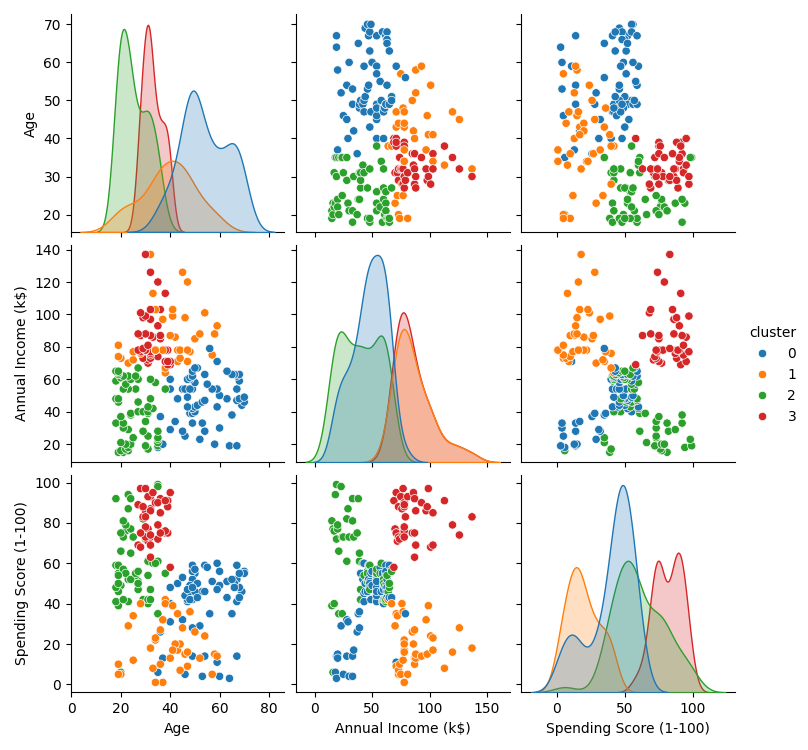

In [14]:
sns.pairplot(data_clustered,hue='cluster',palette='tab10');
plt.show()

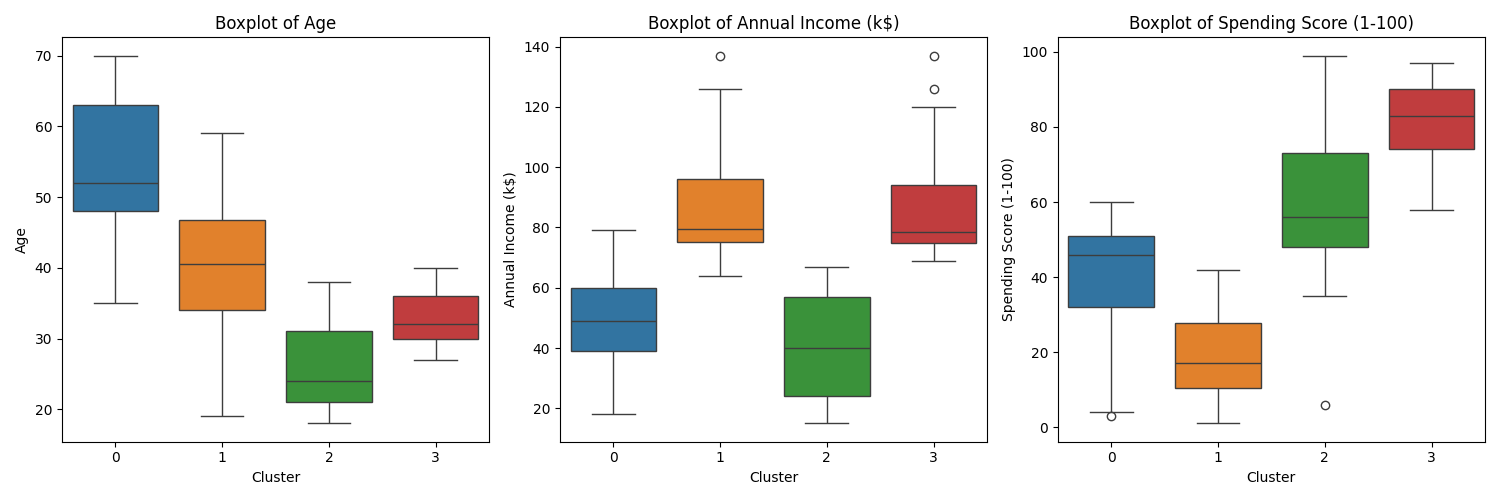

In [15]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(ncols=len(numeric_cols), figsize=(15, 5))

for ax, col in zip(axs, numeric_cols):
    sns.boxplot(data=data_clustered, x='cluster', y=col, ax=ax,palette='tab10')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)
    
plt.tight_layout()
plt.show()

In [16]:
pipeline['Pca'].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [ 0.70661643,  0.00434967,  0.70753413, -0.00590595,  0.00590595]])

In [17]:
pipeline['Pca'].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [18]:
centroids = pipeline['clustering'].cluster_centers_

In [19]:
pipeline[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('Onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('Pca', PCA(n_components=3, random_state=42))])

In [20]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [21]:
Data_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(data),
    columns=pipeline[:-1].get_feature_names_out()
)

In [22]:
Data_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,-1.315210
1,-1.623595,-1.726481,-0.060149
2,0.279614,-1.725314,-2.182574
3,-1.511064,-1.796205,-0.080242
4,-0.095468,-1.707347,-0.690684


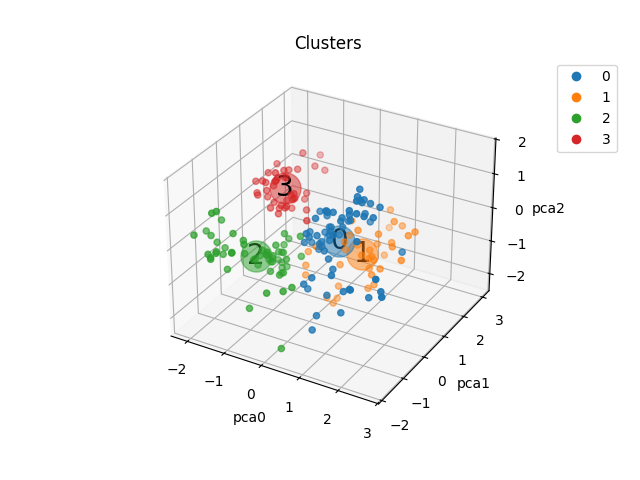

In [23]:
from Functions import view_clusters
view_clusters(
    dataframe=Data_pca,
    colunas=['pca0', 'pca1',
       'pca2'],quantidade_cores=4,centroids=centroids,mostrar_pontos=True,coluna_clusters=data_clustered['cluster']
)
